# Exploring 2014.01 trace dataset
source /usr/swat/bin/ML

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/local/traceset1/2014_04.csv", header='infer')

In [4]:
df.head()

,timestamp,client,AP
0,2014-04-01 00:00:02,3236567d56e24a04b2e1e782d81057d1450ccf52,Bldg23AP20
1,2014-04-01 00:00:08,124f1abd339e9ff8d9a0adbcc414b9dfc819c41e,Bldg1AP6
2,2014-04-01 00:00:17,f44a866e7a7566d410c080daddef02030ca6be04,Bldg1AP7
3,2014-04-01 00:00:19,fdac8f783234abb30a8668087a11a740f1d35698,Bldg14AP18
4,2014-04-01 00:00:24,3bb3c0b656a24206e6df6f870a9be9f8ce1375bb,Bldg23AP42


## Questions:
* We can group by client and visualize trajectory
* We can see which access point gets the most traffic (How many people are at an AP at different times of day)
* Plot out the data by bulding, or over the entire campus. 
* How many people are on campus at a certain time? At what times of day do we see the most load.
* How many people on campus irrespective of access points? 

## For next week:
* Try ploting the results of Q3 from this week - how many people at the most crowded acces points?
* Find at least one person's trajectory. 

# Which access point gets the most/least traffic?

In [5]:
aps = df.AP.unique() # find the unique AP labels; alternative way: aps2 = df["AP"].unique()
occr = df.AP.value_counts() # find and count the occurrence of unique values in a single column of the DataFrame

In [6]:
print(aps[0:20])

['Bldg23AP20' 'Bldg1AP6' 'Bldg1AP7' 'Bldg14AP18' 'Bldg23AP42' 'Bldg11AP15'
 'Bldg1AP12' 'Bldg23AP3' 'Bldg44AP3' 'Bldg3AP69' 'Bldg23AP46' 'Bldg14AP11'
 'Bldg3AP119' 'Bldg44AP2' 'Bldg14AP41' 'Bldg48AP65' 'Bldg1AP10'
 'Bldg16AP4' 'Bldg4AP12' 'Bldg8AP24']


In [7]:
print(occr)

AP
Bldg3AP91     32860
Bldg3AP114    30151
Bldg7AP1      26527
Bldg4AP33     25469
Bldg4AP4      25427
              ...  
Bldg16AP24      350
Bldg23AP24      321
Bldg43AP4       227
Bldg44AP1       105
Bldg19AP2        72
Name: count, Length: 933, dtype: int64


<Axes: title={'center': 'Traffic of APs'}, xlabel='AP', ylabel='Frequency'>

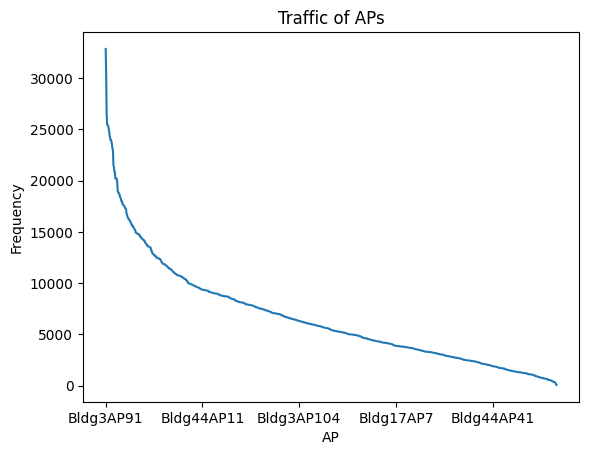

In [8]:
occr.plot(title = "Traffic of APs", xlabel = "AP", ylabel = "Frequency")

[Text(0, 0, '32860'),
 Text(0, 0, '30151'),
 Text(0, 0, '26527'),
 Text(0, 0, '25469'),
 Text(0, 0, '25427'),
 Text(0, 0, '25362'),
 Text(0, 0, '25126'),
 Text(0, 0, '24876'),
 Text(0, 0, '24444'),
 Text(0, 0, '24210'),
 Text(0, 0, '23984'),
 Text(0, 0, '23983'),
 Text(0, 0, '23744'),
 Text(0, 0, '23550'),
 Text(0, 0, '23110'),
 Text(0, 0, '22966'),
 Text(0, 0, '21503'),
 Text(0, 0, '21338'),
 Text(0, 0, '20880'),
 Text(0, 0, '20843'),
 Text(0, 0, '20220'),
 Text(0, 0, '20204'),
 Text(0, 0, '20200'),
 Text(0, 0, '20197'),
 Text(0, 0, '19747'),
 Text(0, 0, '18940'),
 Text(0, 0, '18888'),
 Text(0, 0, '18758'),
 Text(0, 0, '18748'),
 Text(0, 0, '18548'),
 Text(0, 0, '18387'),
 Text(0, 0, '18298'),
 Text(0, 0, '18099'),
 Text(0, 0, '17960'),
 Text(0, 0, '17959'),
 Text(0, 0, '17689'),
 Text(0, 0, '17664'),
 Text(0, 0, '17592'),
 Text(0, 0, '17543'),
 Text(0, 0, '17460'),
 Text(0, 0, '17327'),
 Text(0, 0, '17293'),
 Text(0, 0, '17216'),
 Text(0, 0, '16852'),
 Text(0, 0, '16646'),
 Text(0, 0

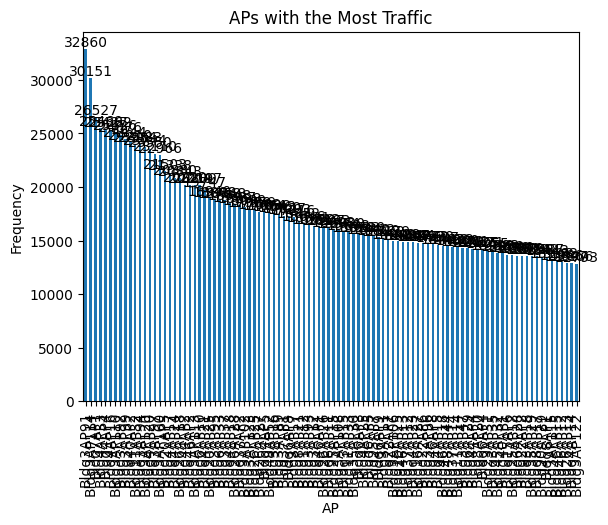

In [9]:
lg_10 = occr.nlargest(n = 100)
plt_lg = lg_10.plot(kind = "bar", title = "APs with the Most Traffic", xlabel = "AP", ylabel = "Frequency")
plt_lg.bar_label(plt_lg.containers[0]) # annotate values

[Text(0, 0, '33'),
 Text(0, 0, '61'),
 Text(0, 0, '75'),
 Text(0, 0, '99'),
 Text(0, 0, '109'),
 Text(0, 0, '160'),
 Text(0, 0, '188'),
 Text(0, 0, '271'),
 Text(0, 0, '294'),
 Text(0, 0, '372')]

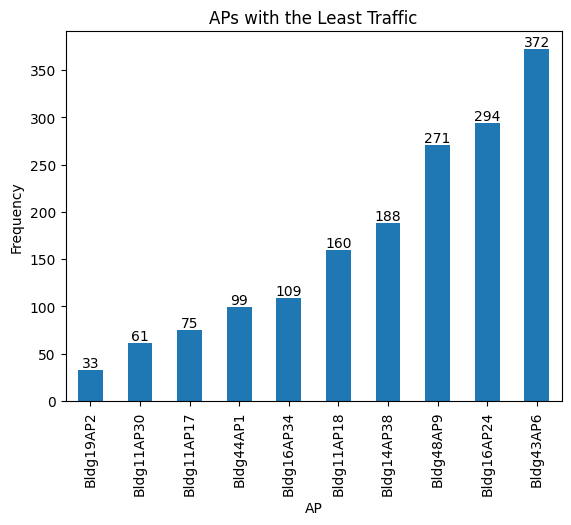

In [9]:
sm_10 = occr.nsmallest(n = 10)
plt_sm = sm_10.plot.bar(title = "APs with the Least Traffic",  xlabel = "AP", ylabel = "Frequency")
plt_sm.bar_label(plt_sm.containers[0]) # annotate values

# How many people are on campus?

### Group by Days

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp']) # unnecessary - convert to pd timestamp
gbDay = df.groupby(pd.Grouper(key='timestamp', freq="24H"))

## Number of associations per day

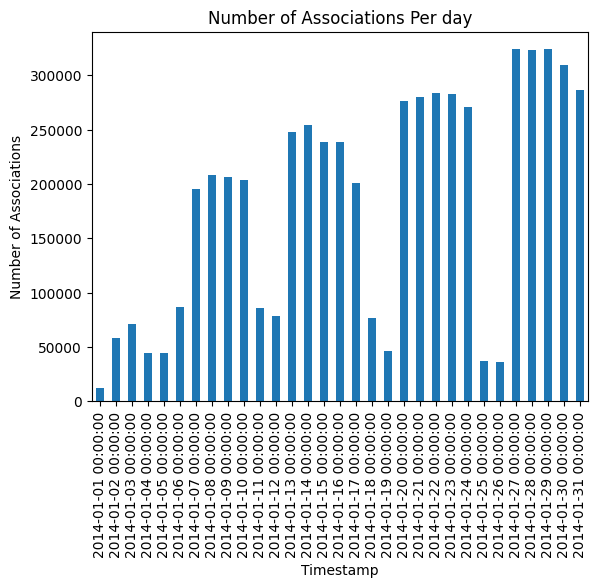

In [11]:
num_asso = gbDay.AP.count() # Group by days
# print(headcounts)
plt_asso = num_asso.plot.bar(title = "Number of Associations Per day", xlabel = "Timestamp", ylabel = "Number of Associations")

## Number of people per day

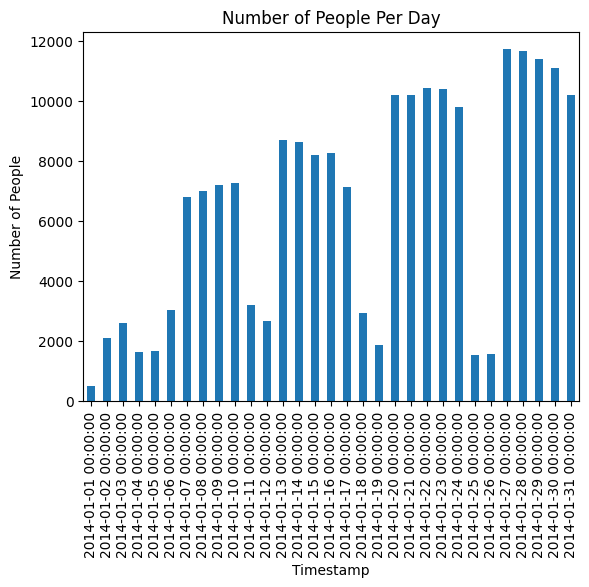

In [12]:
num_ppl = gbDay.client.nunique() # count number of unique client IDs
plt_ppl = num_ppl.plot.bar(title = "Number of People Per Day", xlabel = "Timestamp", ylabel = "Number of People")

### Group by Hours

In [13]:
gbHour = df.groupby(pd.Grouper(key='timestamp', freq="1H"))

## Number of people per hour

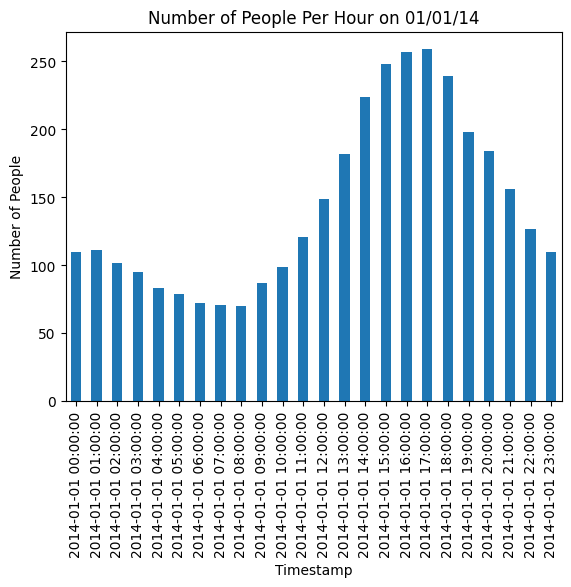

In [14]:
num_ppl_hr = gbHour.client.nunique() # count number of unique client IDs
# plt.figure(figsize=(10,6))
plt_ppl_hr = num_ppl_hr.first('24H').plot.bar(title = "Number of People Per Hour on 01/01/14", xlabel = "Timestamp", ylabel = "Number of People")

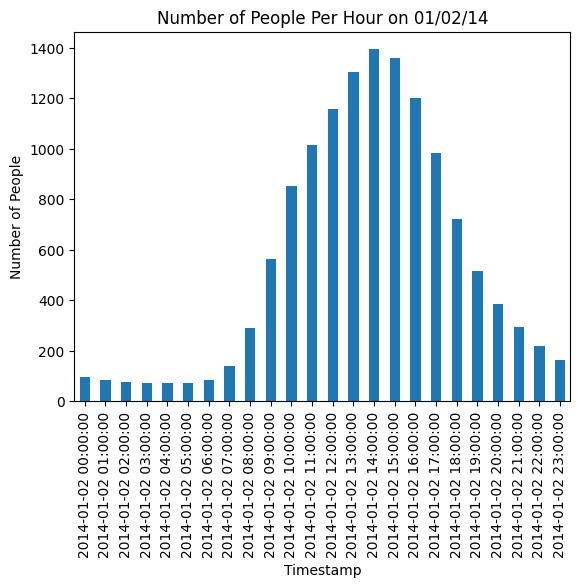

In [15]:
# Define time intervals
start = '01/02/2014'
end = '01/03/2014'
# Convert string to datetime format
start1 = pd.to_datetime(start)
end1 = pd.to_datetime(end)

# filtered data between start1 and end1
mask = (df['timestamp']>start1) & (df['timestamp']<end1)
ppl_filtered = df.loc[mask]

gbHour = ppl_filtered.groupby(pd.Grouper(key='timestamp', freq="1H")).client.nunique()
plt_ppl_interval = gbHour.plot.bar(title = "Number of People Per Hour on 01/02/14", xlabel = "Timestamp", ylabel = "Number of People")

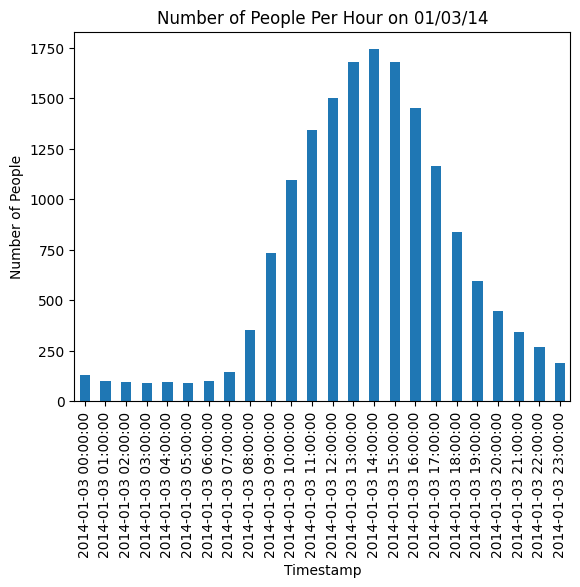

In [16]:
# Define time intervals
start = '01/03/2014'
end = '01/04/2014'
# Convert string to datetime format
start1 = pd.to_datetime(start)
end1 = pd.to_datetime(end)

# filtered data between start1 and end1
mask = (df['timestamp']>start1) & (df['timestamp']<end1)
ppl_filtered = df.loc[mask]
# ppl = df.query('timestamp >= @start1 and timestamp <= @end1')

gbHour = ppl_filtered.groupby(pd.Grouper(key='timestamp', freq="1H")).client.nunique()
plt_ppl_interval = gbHour.plot.bar(title = "Number of People Per Hour on 01/03/14", xlabel = "Timestamp", ylabel = "Number of People")

# Find someone's trajectory

## Find the person with most traffic

In [17]:
ppl_occr = df.client.value_counts()
prsn_client = ppl_occr.nlargest(n = 1)
print(prsn_client)

680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f    17776
Name: client, dtype: int64


In [18]:
# prsn_data = df.loc[df['client'] == '680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f']
prsn_id = '680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f'
prsn_data = df.query('client == @prsn_id')
print(prsn_data)

                  timestamp                                    client  \
4       2014-01-01 00:00:51  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
24      2014-01-01 00:04:06  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
30      2014-01-01 00:05:34  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
37      2014-01-01 00:07:03  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
50      2014-01-01 00:10:22  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
...                     ...                                       ...   
5449276 2014-01-31 11:51:17  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
5450201 2014-01-31 11:52:45  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
5452911 2014-01-31 11:57:30  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
5453878 2014-01-31 11:58:58  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   
5455875 2014-01-31 12:02:06  680fc4c2bd6b252fd6e1a67ad7aa69cdbd3d6e0f   

                AP  
4        Bldg25AP5  
24       Bldg25AP5  
30       Bldg25AP5  
37       Bldg25AP5  
50       Bldg25AP5

<AxesSubplot:title={'center':'Most Accessed APs'}, xlabel='AP', ylabel='Frequency'>

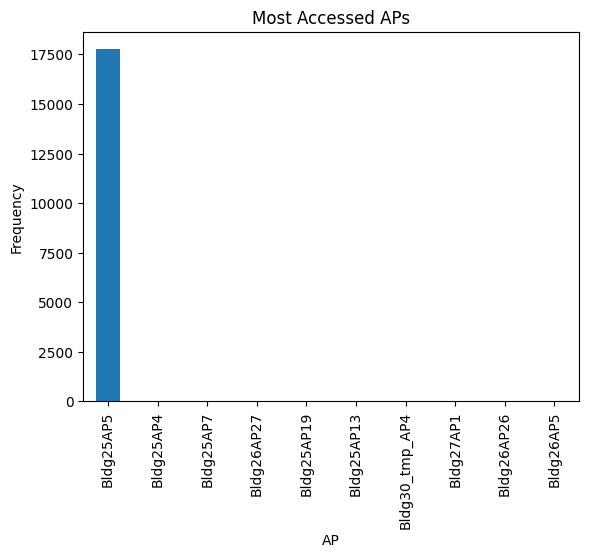

In [19]:
prsn_occr = prsn_data.AP.value_counts()
prsn_occr_lrgst = prsn_occr.nlargest(n = 10)
prsn_occr_lrgst.plot.bar(title = "Most Accessed APs", xlabel = "AP", ylabel= "Frequency")